This notebook demonstrates how to create scatter plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import seaborn as sns
from sklearn.datasets import make_classification
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

We are going to create a random dataset where each sample is composed by two features

In [2]:
num_classes = 3
X, y = make_classification(n_samples=200, n_features=2,
                           n_classes=num_classes, n_informative=2, n_redundant=0, n_repeated=0,
                          class_sep=1.1, n_clusters_per_class=1)

Plot the samples using their features in a scatter graphic

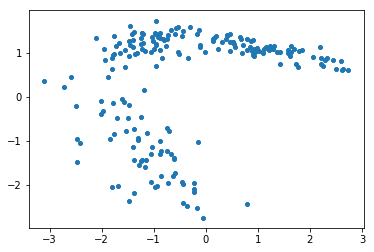

In [3]:
plt.scatter(X[:, 0], X[:, 1], marker='8', s=18)

We can distinguish which samples belongs to each class by using different colors

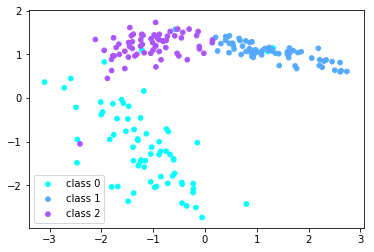

In [4]:
cmap = get_cmap('cool')
for i in range(0, num_classes):
    group = X[y == i, :]
    color = cmap(np.repeat(i / num_classes, len(group)))
    plt.scatter(group[:, 0], group[:, 1], marker='8', s=24,
                c=color, label=i);
plt.legend(['class {}'.format(i) for i in range(0, num_classes)]);

We can also use different markers for each class

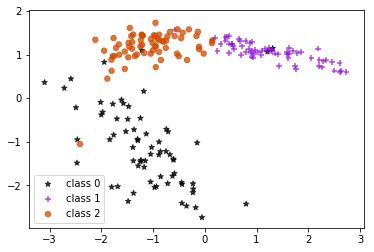

In [5]:
cmap = get_cmap('gnuplot')
markers = ['*', '+', '8']
for i, marker in zip(range(0, num_classes), markers):
    group = X[y == i, :]
    color = cmap(np.repeat(i / num_classes, len(group)))
    plt.scatter(group[:, 0], group[:, 1], marker=marker, s=32,
                c=color, label=i, alpha=0.75);
plt.legend(['class {}'.format(i) for i in range(0, num_classes)]);

The next cells generates a different dataset. This time with 3 features. Then we will plot the samples on a 3D graphic

In [6]:
num_classes = 3
X, y = make_classification(n_samples=250, n_features=3,
                           n_classes=num_classes, n_informative=3, n_redundant=0, n_repeated=0,
                          class_sep=1.25, n_clusters_per_class=2)

You need to add the import <b>from mpl_toolkits.mplot3d import Axes3D</b> in order to create the next plot

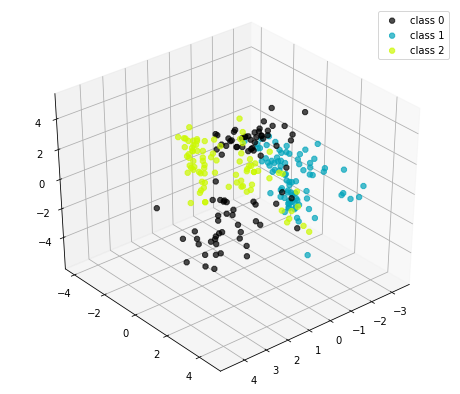

In [8]:
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection='3d')

cmap = get_cmap('nipy_spectral')
for i in range(0, num_classes):
    group = X[y == i, :]
    color = cmap(np.repeat(i / num_classes, len(group)))
    ax.scatter(group[:, 0], group[:, 1], group[:, 2], marker='8', s=32,
               c=color, label=i, alpha=0.7);
plt.legend(['class {}'.format(i) for i in range(0, num_classes)]);
ax.autoscale_view()
ax.view_init(35, 50)

And at the end we are going to generate a dataset with 5 features, and display scatter plots between each pair combination of features using the method pairplot provided by seaborn library

In [156]:
num_classes = 3
X, y = make_classification(n_samples=200, n_features=5,
                           n_classes=num_classes, n_informative=5, n_redundant=0, n_repeated=0,
                          class_sep=1.1, n_clusters_per_class=1)

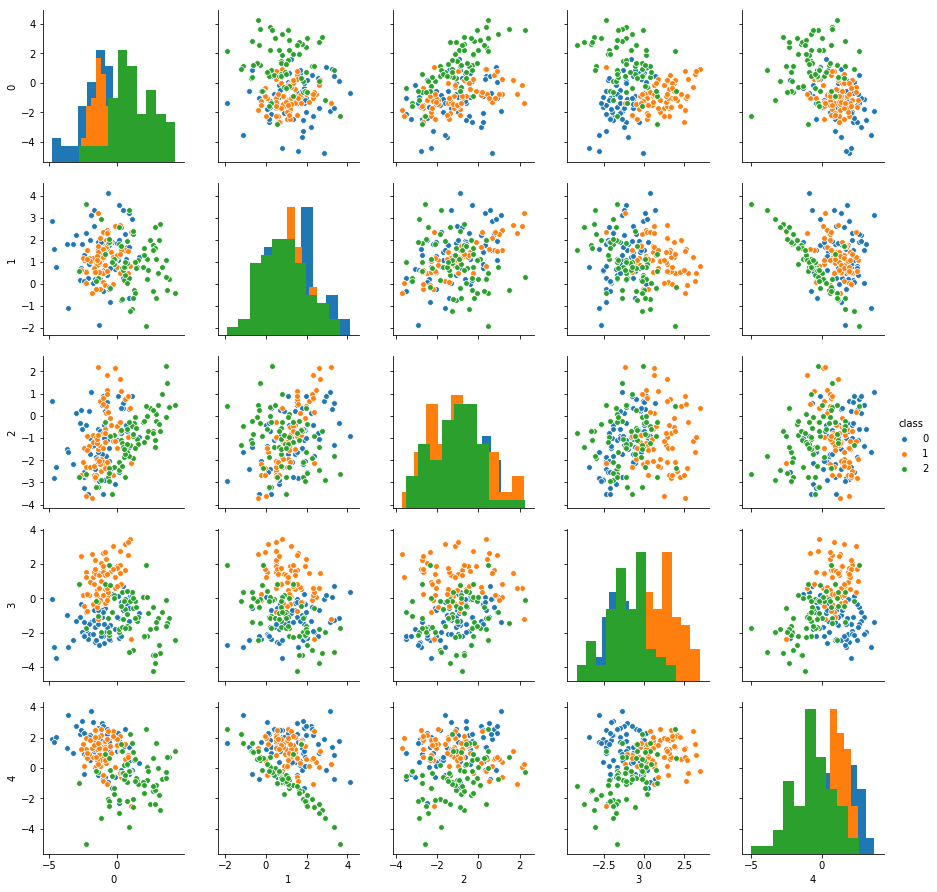

In [174]:
df = pd.DataFrame(X)
df['class'] = y
sns.pairplot(df, hue='class', kind='scatter', diag_kind='hist',
            vars=frozenset(df.columns) - frozenset(['class']),
            markers='8')